In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Unzip dataset (Blender_new)
!mkdir /content/FDA_Drone_Data
!unzip /content/drive/MyDrive/FDA.zip -d /content/FDA_Drone_Data
!rm -rf /content/FDA_Drone_Data/__MACOSX

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_000577.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_001669.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_006106.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_006660.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_000211.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_004077.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_003718.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_002406.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_005369.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_004063.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_002412.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_006674.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_000205.png  
  inflating: /content/FDA_Drone_Data/FDA/labels_1/image_000563.png  
  infla

In [3]:
'''
### Use data.CocoDetection to load COCO annotation
import torch
import torchvision
import torchvision.transforms as T
import torchvision.datasets as datasets
from torchvision.transforms import functional as F
import cv2
import random
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_SIMPLEX
 
root = '/content/FDA_Drone_Data/FDA/images'
annFile = '/content/FDA_Drone_Data/FDA/simulated_corrosion_multi_class_aligned_morph_1.json'
 
# Coco collate_fn
def collate_fn_coco(batch):
    return tuple(zip(*batch))
 
# Coco dataset

coco_det = datasets.CocoDetection(root,annFile,transform=T.ToTensor())
#print(coco_det)


# 创建 Coco sampler
sampler = torch.utils.data.RandomSampler(coco_det) ##无放回地随机采样样本元素。


batch_sampler = torch.utils.data.BatchSampler(sampler, 1, drop_last=True) # torch.utils.data.BatchSampler(sampler, batch_size, drop_last): 在一个batch中封装一个其他的采样器。
print(len(batch_sampler))



# 创建 dataloader
data_loader = torch.utils.data.DataLoader(
        coco_det, batch_sampler=batch_sampler, num_workers=3,
        collate_fn=collate_fn_coco)

# 可视化
for imgs,labels in data_loader:
    for i in range(len(imgs)):
        bboxes = []
        ids = []
        img = labels[i]
        #img = np.asarray(img)
        #plt.imshow(img, cmap='gray')
        print(img)
        aaaa
        labels_ = labels[i]
        for label in labels_:
          bboxes.append([label['bbox'][0],
            label['bbox'][1],
            label['bbox'][0] + label['bbox'][2],
            label['bbox'][1] + label['bbox'][3]
            ])                                  ## bbox: bounding box: [x,y,,w,h]
          ids.append(label['category_id'])
 
        img = img.permute(1,2,0).numpy() ##.permute: change the dimension. In tensor data is stored as C*H*W, to OpenCV we need H*W*C 
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        for box ,id_ in zip(bboxes,ids):
            x1 = int(box[0])
            y1 = int(box[1])
            x2 = int(box[2])
            y2 = int(box[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),thickness=2)
            cv2.putText(img, text=str(id_), org=(x1 + 5, y1 + 5), fontFace=font, fontScale=1, 
                thickness=2, lineType=cv2.LINE_AA, color=(0, 255, 0))
        cv2_imshow(img)
        aaaaa
    



SyntaxError: ignored

In [ ]:
'''
## Write Transform function for COCO  

%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
import torch
import torchvision
import torchvision.transforms as T
import torchvision.datasets as datasets
from torchvision.transforms import functional as F
import cv2
import random
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import Transform as T

font = cv2.FONT_HERSHEY_SIMPLEX
 
root = '/content/FDA_Drone_Data/FDA/images'
annFile = '/content/FDA_Drone_Data/FDA/simulated_corrosion_multi_class_aligned_morph_1.json'


coco_det = datasets.CocoDetection(root,annFile,transform=T.Compose([T.ConvertCocoPolysToMask(), T.ToTensor(), T.RandomHorizontalFlip(0.5)]))

def collate_fn_coco(batch):
    return tuple(zip(*batch))

# 创建 Coco sampler
#sampler = torch.utils.data.RandomSampler(coco_det) ##无放回地随机采样样本元素。


#batch_sampler = torch.utils.data.BatchSampler(sampler, 1, drop_last=True) # torch.utils.data.BatchSampler(sampler, batch_size, drop_last): 在一个batch中封装一个其他的采样器。


# 创建 dataloader
data_loader = torch.utils.data.DataLoader(
        coco_det, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
print(len(data_loader))

sourceloader_iter = iter(data_loader) ## iter: Get each image(stored in tensor form) in DataLodaer
print(len(sourceloader_iter))

for imgs,labels in data_loader:
    for i in range(len(imgs)):
        bboxes = []
        ids = []
        img = labels[i]
        #img = np.asarray(img)
        #plt.imshow(img, cmap='gray')
        print(img)
        aaaa
        labels_ = labels[i]
        for label in labels_:
          bboxes.append([label['bbox'][0],
            label['bbox'][1],
            label['bbox'][0] + label['bbox'][2],
            label['bbox'][1] + label['bbox'][3]
            ])                                  ## bbox: bounding box: [x,y,,w,h]
          ids.append(label['category_id'])
 
        img = img.permute(1,2,0).numpy() ##.permute: change the dimension. In tensor data is stored as C*H*W, to OpenCV we need H*W*C 
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        for box ,id_ in zip(bboxes,ids):
            x1 = int(box[0])
            y1 = int(box[1])
            x2 = int(box[2])
            y2 = int(box[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),thickness=2)
            cv2.putText(img, text=str(id_), org=(x1 + 5, y1 + 5), fontFace=font, fontScale=1, 
                thickness=2, lineType=cv2.LINE_AA, color=(0, 255, 0))
        cv2_imshow(img)
'''

In [4]:
from pycocotools.coco import COCO
import os
import os.path as osp
import sys
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import cv2
import numpy as np
from pycocotools.coco import COCO
from google.colab.patches import cv2_imshow
from torch.utils.data import DataLoader

image = '/content/FDA_Drone_Data/FDA/images'
info_json =  '/content/FDA_Drone_Data/FDA/simulated_corrosion_multi_class_aligned_morph_1.json'

class COCOAnnotationTransform(object):
    def __init__(self):
        self.label_map = COCO_LABEL_MAP

    def __call__(self, target, width, height):
        scale = np.array([width, height, width, height])
        res = []
        for obj in target:
            if 'bbox' in obj:
                bbox = obj['bbox']
                label_idx = self.label_map[obj['category_id']] - 1
                final_box = list(np.array([bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]])/scale)
                final_box.append(label_idx)
                res += [final_box]  # [xmin, ymin, xmax, ymax, label_idx]
            else:
                print("No bbox found for object ", obj)

        return res  # [[xmin, ymin, xmax, ymax, label_idx], ... ]


class COCODetection(data.Dataset):
    def __init__(self, image_path, info_file, transform=None,
                 target_transform=None, has_gt=True):
        self.root = image_path
        self.coco = COCO(info_file)
        self.ids = list(self.coco.imgToAnns.keys())  # 标签数目 小于样本数目，说明有的图像没有标签

        if len(self.ids) == 0 or not has_gt:  # 如果没有标签或者不需要GT，则直接使用image
            self.ids = list(self.coco.imgs.keys())
        self.transform = transform
        self.target_transform = target_transform

        self.has_gt = has_gt

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, index):
        im, gt, Mask, h, w, num_crowds, name, Cat = self.pull_item(index)
        return im, (gt, Mask, num_crowds), name, Cat

    def pull_item(self, index):
        img_id = self.ids[index]
        if self.has_gt:
            ann_ids = self.coco.getAnnIds(imgIds=img_id) 
            target = self.coco.loadAnns(ann_ids)
        else:
            target = []
        crowd = [x for x in target if ('iscrowd' in x and x['iscrowd'])] ## iscrowd=0: single target.   iscrowd=1: a group of target(overlapping)
        target = [x for x in target if not ('iscrowd' in x and x['iscrowd'])]
        num_crowds = len(crowd)

        # This is so we ensure that all crowd annotations are at the end of the array
        target += crowd
        file_name = self.coco.loadImgs(img_id)[0]['file_name']
        path = osp.join(self.root, file_name)
        img = cv2.imread(path)
        height, width, _ = img.shape
        if len(target) > 0: # 这样图像中有不是crowd的目标
            Cat = []
            Mask = self.coco.annToMask(target[0]).reshape(-1)
            for obj in target:
              mask = self.coco.annToMask(obj).reshape(-1)
              cat = obj['category_id']

              if cat not in Cat:
                Cat.append(cat)
                Mask = np.vstack((Mask, mask))
              else:
                Mask[-1] = Mask[-1] + mask
              
            Mask = Mask.reshape(-1, height, width)
            Mask = Mask[1:]
        if self.target_transform is not None and len(target) > 0:
            target = self.target_transform(target, width, height)
        return torch.from_numpy(img).permute(2, 0, 1), target, Mask, height, width, num_crowds, file_name, Cat


In [ ]:
## Show the labeled image extracted from json File 
if __name__=='__main__':
    dataset = COCODetection(image, info_json)
    loader = DataLoader(dataset)
    for img, label, name, Cat in loader:
        img = np.uint8(img.squeeze().numpy().transpose(1, 2, 0))
        print(name[0], '\n', Cat)
        gt, masks, num_crowds = label
        masks = masks.squeeze(0) ## .squeeze(A): Delete A_th dimension. Now we left batch * H * w, each batch represent a category labeled by 'pixel==1'
        color = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])
        for m in range(masks.size(0)):
            mask = masks[m].numpy()
            y, x = np.where(mask == 1)
            img[y, x, :] = color[m]
        cv2_imshow(img)
        cv2.waitKey(500)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
## Write labeled images
%cd /content/FDA_Drone_Data/FDA
!mkdir ./Label_fromJSON


if __name__=='__main__':
    dataset = COCODetection(image, info_json)
    loader = DataLoader(dataset)
    count = 0
    for img, label, name, Cat in loader:
        img = np.uint8(img.squeeze().numpy().transpose(1, 2, 0))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        Name = name[0].replace('image', 'label')
        gt, masks, num_crowds = label
        masks = masks.squeeze(0) ## .squeeze(A): Delete A_th dimension. Now we left batch * H * w, each batch represent a category labeled by 'pixel==1'
        label_img = np.zeros_like(gray)
        Cat_np = []
        for i in Cat:
          Cat_np.append(i.numpy().reshape(-1))
        for m in range(masks.size(0)):
          mask = masks[m].numpy()
          label_img[np.where(mask==1)] = Cat_np[m][0]
        cv2.imwrite(osp.join('/content/FDA_Drone_Data/FDA/Label_fromJSON', Name), label_img)
        count = count + 1
        print('{}/6171 labels are established'.format(count))

流式输出内容被截断，只能显示最后 5000 行内容。
1172/6171 labels are established
1173/6171 labels are established
1174/6171 labels are established
1175/6171 labels are established
1176/6171 labels are established
1177/6171 labels are established
1178/6171 labels are established
1179/6171 labels are established
1180/6171 labels are established
1181/6171 labels are established
1182/6171 labels are established
1183/6171 labels are established
1184/6171 labels are established
1185/6171 labels are established
1186/6171 labels are established
1187/6171 labels are established
1188/6171 labels are established
1189/6171 labels are established
1190/6171 labels are established
1191/6171 labels are established
1192/6171 labels are established
1193/6171 labels are established
1194/6171 labels are established
1195/6171 labels are established
1196/6171 labels are established
1197/6171 labels are established
1198/6171 labels are established
1199/6171 labels are established
1200/6171 labels are established
1201/6171 labels

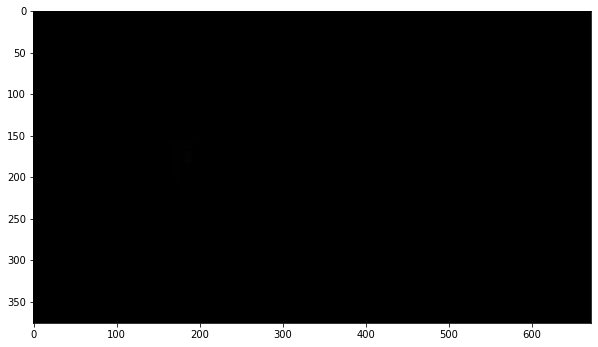

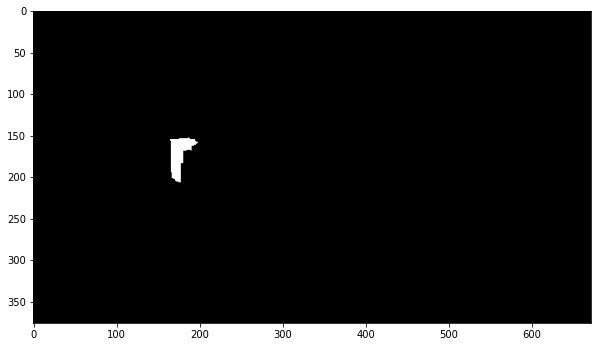

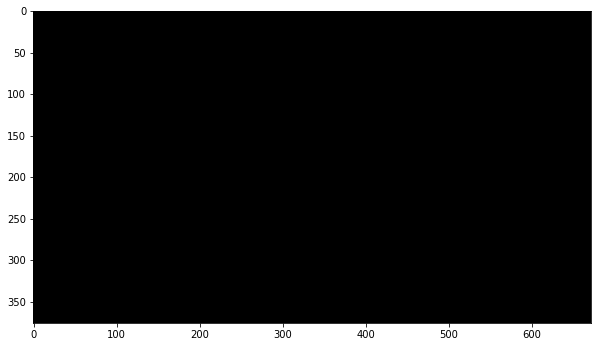

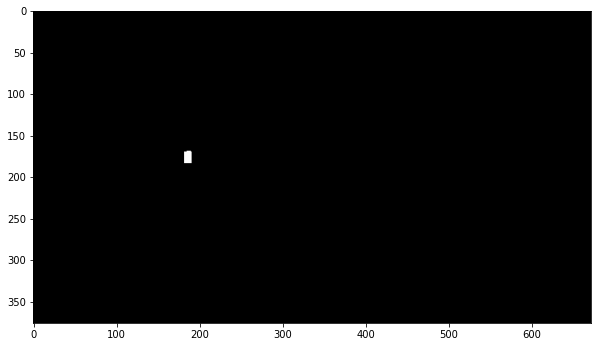

In [ ]:
'''
import matplotlib.pyplot as plt
image = cv2.imread('/content/FDA_Drone_Data/FDA/Label_fromJSON/label_000030.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

img = image.copy()
seam = img[:,:,0]
seam[np.where(seam!=1)] = 0

img = image.copy()
edge = img[:,:,0]
edge[np.where(edge!=2)] = 0

img = image.copy()
spot = img[:,:,0]
spot[np.where(spot!=3)] = 0

plt.figure(figsize=(10,10))
plt.imshow(seam, cmap = 'gray')
plt.figure(figsize=(10,10))
plt.imshow(edge, cmap = 'gray')
plt.figure(figsize=(10,10))
plt.imshow(spot, cmap = 'gray')
'''

In [ ]:
## Dateset info
%cd /content/FDA_Drone_Data/FDA
!python3 annotation.py info -c simulated_corrosion_multi_class_aligned_morph_1.json 

/content/FDA_Drone_Data/FDA
loading annotations into memory...
Done (t=0.28s)
creating index...
index created!

simulated_corrosion_multi_class_aligned_morph_1.json
	category ids: [1, 2, 3]
		Seam: 1 
			8596 annotations 
			4663 images
		Edge: 2 
			8274 annotations 
			4325 images
		Spot: 3 
			4361 annotations 
			2770 images
	images annotated with category: 6171
	images annotated but with no category: 12
	images total: 6183




/content
/content/drive/MyDrive/FDA_CorssionPosition_Seg


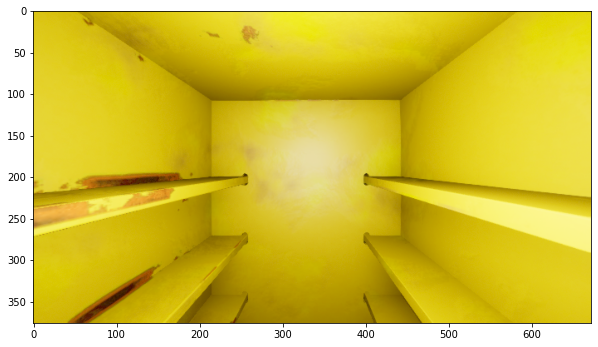

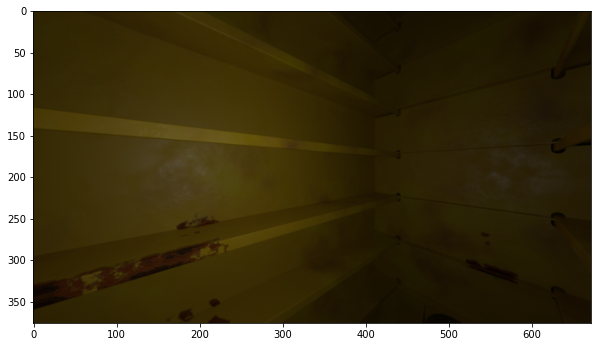

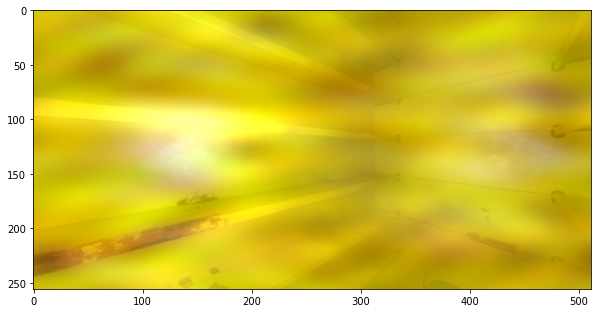

In [6]:
## Demo image(Example of style transformation)
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%cd /content
!mkdir ./result
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 FDA_demo.py

img_src = cv2.imread('/content/FDA_Drone_Data/FDA/images/image_002469.png')
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
img_target = cv2.imread('/content/FDA_Drone_Data/FDA/airsim_images/images/frame000314.png')
img_target = cv2.cvtColor(img_target, cv2.COLOR_BGR2RGB)

img_trans = cv2.imread('/content/result/src_in_tar.png')

plt.figure(figsize=(10,10))
plt.imshow(img_target)

plt.figure(figsize=(10,10))
plt.imshow(img_src)

plt.figure(figsize=(10,10))
plt.imshow(img_trans)

In [ ]:
## Get mean image
import os
import os.path as osp
import cv2
import numpy as np

path = '/content/FDA_Drone_Data/FDA/airsim_images/images'
count = 0
blue = 0
green = 0
red = 0

for f in os.listdir(path):
  if f.endswith('.png'):
    img = cv2.imread(osp.join('/content/FDA_Drone_Data/FDA/airsim_images/images', f))
    #img = cv2.resize(img, ())
    h,w = img.shape[0:2]
    blue = blue+ img[:,:,0].sum()
    green = green + img[:,:,1].sum()
    red = red + img[:,:,2].sum()
    count = count + 1

red_mean = red/(count * h * w)
green_mean = green/(count * h * w)
blue_mean = blue/(count * h * w)
image_mean = [red_mean, green_mean, blue_mean]
print(image_mean)

[174.91789185381634, 153.4683112375823, 27.693653697007072]


In [ ]:
'''
import os
import os.path as osp
import cv2
import numpy as np

#wj=n_samples / (n_classes * n_samplesj)


path = '/content/FDA_Drone_Data/FDA/Label_fromJSON'
class0 = 0
class1 = 0
class2 = 0
class3 = 0
class_num = 4
for f in os.listdir(path):
  if f.endswith('.png'):
    image = cv2.imread(osp.join(path, f))
    img = image[:,:,0]
    h, w = img.shape[0:2]
    a = np.where(img==0)
    b = np.where(img==1)
    c = np.where(img==2)
    d = np.where(img==3)
    class0 += len(a[0])
    class1 += len(b[0])
    class2 += len(c[0])
    class3 += len(d[0])

class_total = class0 + class1 + class2 + class3

weights_class0 = class_total/(class_num * class0)
weights_class1 = class_total/(class_num * class1)
weights_class2 = class_total/(class_num * class2)
weights_class3 = class_total/(class_num * class3)
print('weights_class0:{} \n weights_class1:{} \n weights_class2:{} \n weights_class3:{}'.format(weights_class0, weights_class1, weights_class2, weights_class3))
'''


weights_class0:0.25261740303818325 
 weights_class1:69.09333269523741 
 weights_class2:43.53983275894133 
 weights_class3:249.75715471038055


In [ ]:
'''
class0 = 6171
class1 = 8596
class2 = 8274
class3 = 4361
class_num = 3

class_total = class1 + class2 + class3

#weights_class0 = class_total/(class_num * class0)
weights_class1 = class_total/(class_num * class1)
weights_class2 = class_total/(class_num * class2)
weights_class3 = class_total/(class_num * class3)
#print('weights_class0:{} \n weights_class1:{} \n weights_class2:{} \n weights_class3:{}'.format(weights_class0, weights_class1, weights_class2, weights_class3))
print('weights_class1:{} \n weights_class2:{} \n weights_class3:{}'.format(weights_class1, weights_class2, weights_class3))
'''

weights_class1:0.8232899022801303 
 weights_class2:0.8553299492385786 
 weights_class3:1.622792937399679


In [ ]:
## Write the list of source and target images
import os

def get_imlist(path, txt):
  data = open(txt, 'w+')
  for f in os.listdir(path):
    if f.endswith('.png'):
      print(f, file = data)
  data.close()

  #return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]

Source_list = get_imlist('/content/FDA_Drone_Data/FDA/Label_fromJSON', '/content/Sourcelist.txt')
Target_list = get_imlist('/content/FDA_Drone_Data/FDA/airsim_images/images', '/content/Targetlist.txt')

In [ ]:
## Unzip dataset (Airsim with groundtruth)
!unzip /content/drive/MyDrive/blender_airsim_aligned.zip -d /content/FDA_Drone_Data
!rm -rf /content/FDA_Drone_Data/__MACOSX

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_000958.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_000794.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_002183.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_004294.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_002815.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_000964.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_000970.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_002801.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_004337.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_003458.png  
  inflating: /content/FDA_Drone_Data/blender_airsim_aligned/airsim/image_002746.png  
  inflating: /content/FDA_D

In [ ]:
## Write labeled images for Validation
%cd /content/FDA_Drone_Data/blender_airsim_aligned
!mkdir ./Label_fromJSON

image = './airsim'
info_json =  './simulated_corrosion_multi_class_1.json'

if __name__=='__main__':
    dataset = COCODetection(image, info_json)
    loader = DataLoader(dataset)
    count = 0
    for img, label, name, Cat in loader:
        img = np.uint8(img.squeeze().numpy().transpose(1, 2, 0))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        Name = name[0].replace('image', 'label')
        gt, masks, num_crowds = label
        masks = masks.squeeze(0) ## .squeeze(A): Delete A_th dimension. Now we left batch * H * w, each batch represent a category labeled by 'pixel==1'
        label_img = np.zeros_like(gray)
        Cat_np = []
        for i in Cat:
          Cat_np.append(i.numpy().reshape(-1))
        for m in range(masks.size(0)):
          mask = masks[m].numpy()
          label_img[np.where(mask==1)] = Cat_np[m][0]
        cv2.imwrite(osp.join('/content/FDA_Drone_Data/blender_airsim_aligned/Label_fromJSON', Name), label_img)
        count = count + 1
        print('{}/2767 labels are established'.format(count))

/content/FDA_Drone_Data/blender_airsim_aligned
loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
1/2767 labels are established
2/2767 labels are established
3/2767 labels are established
4/2767 labels are established
5/2767 labels are established
6/2767 labels are established
7/2767 labels are established
8/2767 labels are established
9/2767 labels are established
10/2767 labels are established
11/2767 labels are established
12/2767 labels are established
13/2767 labels are established
14/2767 labels are established
15/2767 labels are established
16/2767 labels are established
17/2767 labels are established
18/2767 labels are established
19/2767 labels are established
20/2767 labels are established
21/2767 labels are established
22/2767 labels are established
23/2767 labels are established
24/2767 labels are established
25/2767 labels are established
26/2767 labels are established
27/2767 labels are established
28/2767 labels are established
29/2767 lab

In [ ]:
## Write the list of val images
import os

def get_imlist(path, txt):
  data = open(txt, 'w+')
  for f in os.listdir(path):
    if f.endswith('.png'):
      print(f, file = data)
  data.close()

  #return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]

val_list = get_imlist('/content/FDA_Drone_Data/blender_airsim_aligned/Label_fromJSON', '/content/Vallist.txt')


In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/drive/MyDrive/results_SourceOnly' --restore-opt1='/content/drive/MyDrive/checkpoints/Blender_sourceOnly' #--restore-opt2='/content/drive/MyDrive/checkpoints/FDA_final/Blender_LB005' --restore-opt3='/content/drive/MyDrive/checkpoints/FDA_final/Blender_LB009'   #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'


/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
## Train the model
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 train.py --snapshot-dir='../checkpoints/FDA' --LB=0.01 --entW=0.005 --ita=2.0 --switch2entropy=20000 --set='train' --model='DeepLab' #--restore-from='/content/drive/MyDrive/checkpoints/FDA/Blender_40800' #--learning-rate=1.0e-4  #--init-weights='../checkpoints/FDA/init_weight/DeepLab_init.pth'


/content/drive/MyDrive/FDA_CorssionPosition_Seg
----------------- Options ---------------
                      GPU: 0                             
                       LB: 0.01                          
               batch_size: 4                             
                 data_dir: /content/FDA_Drone_Data/FDA   
          data_dir_target: /content/FDA_Drone_Data       
                data_list: /content/Sourcelist.txt       
         data_list_target: /content/Vallist.txt          
                     entW: 0.005                         
             init_weights: None                          
                      ita: 2.0                           
             label_folder: None                          
            learning_rate: 0.0005                        
                  matname: loss_log.mat                  
                    model: DeepLab                       
                 momentum: 0.9                           
              num_classes: 4            

In [ ]:
!rm -rf /content/results

In [ ]:
a = np.load('/content/ConfusionMatrix.npy')

FileNotFoundError: ignored

In [ ]:
x = a[1500]

In [ ]:
x

array([[2.49041e+05, 8.48000e+02, 1.67000e+02, 2.48000e+02],
       [1.02000e+02, 1.32700e+03, 0.00000e+00, 0.00000e+00],
       [7.77000e+02, 4.00000e+00, 3.60000e+01, 0.00000e+00],
       [1.40000e+01, 0.00000e+00, 0.00000e+00, 1.08000e+02]])

In [ ]:
np.mean(np.diag(x)/(x.sum(1) + x.sum(0) - np.diag(x)))

0.4280695394438653

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_LB009' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 evaluation_multi.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA_final/Blender_LB001' --restore-opt2='/content/drive/MyDrive/checkpoints/FDA_final/Blender_LB005' --restore-opt3='/content/drive/MyDrive/checkpoints/FDA_final/Blender_LB009'   #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'


/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
evaluation_multi.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted th

In [ ]:
mat = np.load('/content/ConfusionMatrix.npy')
a = mat[-1]
np.round(a/a.max(), 4)

array([[1.00e+00, 7.41e-02, 7.60e-02, 1.40e-02],
       [2.30e-03, 1.21e-02, 2.30e-03, 4.00e-04],
       [6.40e-03, 1.70e-03, 1.24e-02, 4.00e-04],
       [4.00e-04, 6.00e-04, 5.00e-04, 7.00e-04]])

In [ ]:
np.round(a/a.max(), 3)

array([[1.   , 0.074, 0.076, 0.014],
       [0.002, 0.012, 0.002, 0.   ],
       [0.006, 0.002, 0.012, 0.   ],
       [0.   , 0.001, 0.001, 0.001]])

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56725' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
#CS_weights = np.array( (0.01, 0.41, 0.5875, 0.6), dtype=np.float32 )
a = np.load('/content/ConfusionMatrix.npy')
mat = a[-1]
np.round(mat/mat.max(), 4)

array([[1.00e+00, 4.11e-02, 4.73e-02, 6.40e-03],
       [4.20e-03, 9.70e-03, 1.70e-03, 4.00e-04],
       [9.30e-03, 1.50e-03, 8.20e-03, 5.00e-04],
       [6.00e-04, 5.00e-04, 4.00e-04, 6.00e-04]])

In [ ]:
np.round(mat/mat.max(), 3)

array([[1.   , 0.041, 0.047, 0.006],
       [0.004, 0.01 , 0.002, 0.   ],
       [0.009, 0.002, 0.008, 0.   ],
       [0.001, 0.   , 0.   , 0.001]])

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_52915' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
Traceback (most recent call last):
  File "Test.py", line 184, in <module>
    main()
  File "Test.py", line 115, in main
    model1 = CreateModel(args)
  File "/content/drive/MyDrive/FDA_CorssionPosition_Seg/model/__init__.py", line 11, in CreateModel
    model = Deeplab(num_classes=args.num_classes, init_weights=args.init_weights, restore_from=args.restore_from, phase=phase)
  File "/content/drive/MyDrive/FDA_CorssionPosition_Seg/model/deeplab.py", line 260, in Deeplab
    model.load_state_dict(torch.load(restore_from + '.pth', map_location=lambda storage, loc: storage))        
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 699, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 231, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 21

In [ ]:
a = np.load('/content/ConfusionMatrix.npy')
mat = a[-1]
np.round(mat/mat.max(), 4)

array([[1.00e+00, 9.50e-03, 1.17e-02, 1.60e-03],
       [3.90e-03, 8.50e-03, 2.40e-03, 2.00e-04],
       [8.00e-03, 9.00e-04, 9.20e-03, 2.00e-04],
       [6.00e-04, 4.00e-04, 5.00e-04, 5.00e-04]])

In [ ]:
np.round(mat/mat.max(), 3)

array([[1.   , 0.01 , 0.012, 0.002],
       [0.004, 0.008, 0.002, 0.   ],
       [0.008, 0.001, 0.009, 0.   ],
       [0.001, 0.   , 0.   , 0.   ]])

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48605' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
mat = np.load('/content/ConfusionMatrix.npy')
a = mat[-1]
np.round(a/a.max(), 4)

array([[1.00e+00, 1.89e-02, 2.89e-02, 2.90e-03],
       [2.50e-03, 9.40e-03, 3.20e-03, 3.00e-04],
       [6.70e-03, 1.20e-03, 1.06e-02, 3.00e-04],
       [4.00e-04, 5.00e-04, 5.00e-04, 6.00e-04]])

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48140' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48150' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48505' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48515' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48725' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_48735' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_49245' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_49450' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_49515' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_49520' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_49975' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_49980' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_50185' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_50300' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_50475' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_50580' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_50710' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_51410' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_51545' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_51600' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_51690' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_51815' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_52045' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_52290' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_52565' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_52790' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_52830' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_53175' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_53185' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_53640' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_53790' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_54160' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_54335' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_54445' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_54740' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_54975' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55185' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55215' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55610' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55630' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55640' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55725' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_55755' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56050' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56110' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56170' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56205' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56320' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56485' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56640' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56770' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_56800' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_57270' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_57375' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_57945' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_57975' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_57980' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_58475' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_59325' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_59685' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal

In [ ]:
%cd /content/drive/MyDrive/FDA_CorssionPosition_Seg
!python3 Test.py --model='DeepLab' --save='/content/results' --restore-opt1='/content/drive/MyDrive/checkpoints/FDA/Blender_59780' #--data-dir-target='/content/FDA_Drone_Data/FDA/images' --data-list-target='/content/Sourcelist.txt' --gt_dir='/content/FDA_Drone_Data/FDA/Label_fromJSON' --devkit_dir='/content/Sourcelist.txt'
!rm -rf /content/results

/content/drive/MyDrive/FDA_CorssionPosition_Seg
0 processd
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
100 processd
200 processd
300 processd
400 processd
500 processd
600 processd
700 processd
800 processd
900 processd
1000 processd
1100 processd
1200 processd
1300 processd
1400 processd
1500 processd
1600 processd
1700 processd
1800 processd
1900 processd
2000 processd
2100 processd
2200 processd
2300 processd
2400 processd
2500 processd
2600 processd
2700 processd
---------Compute IoU------------------
Test.py:64: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scal